In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('international_matches.csv')
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(23921, 25)

In [4]:
df.info() # prints the dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [5]:
df['date']=pd.to_datetime(df['date'])
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [6]:
# Select the relevant columns from the dataframe
fifa_rank=df[['date','home_team','away_team','home_team_fifa_rank','away_team_fifa_rank','away_team_total_fifa_points','home_team_total_fifa_points']]
# Create 'home' and 'away' dataframes, and rename columns for consistency
home=fifa_rank[['date','home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns={'home_team':'team','home_team_fifa_rank':'rank','home_team_total_fifa_points':'rank_points'})
away=fifa_rank[['date','away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns={'away_team':'team','away_team_fifa_rank':'rank','away_team_total_fifa_points':'rank_points'})
# Concatenate the 'home' and 'away' dataframes using pd.concat() instead of append()
fifa_rank = pd.concat([home, away], ignore_index=True)
# Sort values by 'team' and 'date'
fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
# Add a row number for each team, grouped by 'team'
fifa_rank['row_number']=fifa_rank.groupby('team').cumcount()+1
# Filter the top FIFA rankings and drop the 'row_number' column
fifa_rank_top=fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10,'rank')
# Display the result
fifa_rank_top

,date,team,rank,rank_points
47681,2022-06-06,Brazil,1,1832
47830,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
47828,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
47788,2022-06-12,Portugal,8,1674
47824,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


# Checking Null values before doing EDA

In [7]:
columns_contains_null_values=[col for col in df.columns if df[col].isnull().any()]
print(f'columns containing null values: \n\n {columns_contains_null_values}')

columns containing null values: 

 ['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


In [8]:
wc_2022=['Qatar','Ecuador','Senegal','Netherlands','England','IR Iran','USA','Wales','Argentina','Saudi Arabia', 'Mexico',
        'Poland','France','Australia','Denmark', 'Tunisia','Spain','Costa Rica','Germany','Japan','Belgium','Canada',
        'Morocco','Croatia','Brazil','Serbia','Switzerland','Cameroon','Portugal','Ghana','Uruguay','Korea Republic']

In [9]:
for x in wc_2022:
    for y in columns_contains_null_values:
        df[y].fillna(df[df[y[0:9]]==x][y].mean(),inplace=True)
    

In [10]:
# IS there any Home Team Advantage

In [11]:
hometeam=df[['country','home_team_score','away_team_score']]
hometeam.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
1,Brazil,1,1
2,Ecuador,5,0
3,Guinea,1,0
4,Paraguay,1,3


In [23]:
hometeam['home_team_score']>hometeam['away_team_score']
home_wins=hometeam.loc[hometeam['home_team_score']>hometeam['away_team_score']]
home_wins
# We see the scoreline of the games that home team wins with what scoreline

,country,home_team_score,away_team_score
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0
...,...,...,...
23908,Netherlands,3,2
23912,Bosnia and Herzegovina,3,2
23915,Turkey,2,0
23916,Moldova,2,1


In [24]:
# Checking how many times home teams lost their games
hometeam['home_team_score']<hometeam['away_team_score']
home_loss=hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]
home_loss

,country,home_team_score,away_team_score
4,Paraguay,1,3
5,Peru,0,1
8,Faroe Islands,0,7
9,Sweden,1,2
26,Iceland,0,1
...,...,...,...
23909,Poland,0,1
23910,Armenia,1,4
23913,Romania,0,3
23917,Liechtenstein,0,2


# This shows the hometeams that lost their games

In [25]:
# Merging both the above tables
home_ad=home_wins[['country','home_team_score','away_team_score']].rename(columns={'home_team_score':'Home_team_win', 'away_team_score':'Home_team_loss'})
away_ad=home_loss[['country','home_team_score','away_team_score']].rename(columns={'home_team_score':'Home_team_win', 'away_team_score':'Home_team_loss'})

home_advantage=pd.concat([home_ad,away_ad],ignore_index=True)
home_advantage.head()

,country,Home_team_win,Home_team_loss
0,Bolivia,3,1
1,Ecuador,5,0
2,Guinea,1,0
3,Zimbabwe,2,0
4,Guinea,4,0


In [14]:
# There is a slight advantage for home team

# Which Team has the most wins

In [16]:
home_team=df[['date','home_team','home_team_score','away_team_score']]
home_team.head(15)

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [17]:
# Check for all home teams that won their games
home_team['home_team_score']>home_team['away_team_score']
home_wins=home_team.loc[hometeam['home_team_score']>home_team['away_team_score']]
home_wins.head()

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0


In [18]:
# To see away teams won the games

In [27]:
home_team['home_team_score']<home_team['away_team_score']
homeloss=home_team.loc[home_team['home_team_score']<home_team['away_team_score']]
homeloss.head()
# This shows the hometeams that lost their games

,date,home_team,home_team_score,away_team_score
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2
26,1993-08-31,Iceland,0,1


In [20]:
# Correcting the rename dictionary syntax
hometeam_wins = home_wins[['date', 'home_team', 'home_team_score', 'away_team_score']].rename(
    columns={'home_team': 'team', 'home_team_score': 'Home_team_win', 'away_team_score': 'away_team_win'}
)

awayteam_wins = homeloss[['date', 'home_team', 'home_team_score', 'away_team_score']].rename(
    columns={'home_team': 'team', 'home_team_score': 'Home_team_win', 'away_team_score': 'away_team_win'}
)
Team_streak=pd.concat([hometeam_wins, awayteam_wins], ignore_index=True)
Team_streak

,date,team,Home_team_win,away_team_win
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Ecuador,5,0
2,1993-08-08,Guinea,1,0
3,1993-08-08,Zimbabwe,2,0
4,1993-08-09,Guinea,4,0
...,...,...,...,...
18209,2022-06-14,Poland,0,1
18210,2022-06-14,Armenia,1,4
18211,2022-06-14,Romania,0,3
18212,2022-06-14,Liechtenstein,0,2


In [21]:
Team_streak['team'].value_counts().nlargest(1)

team
USA    253
Name: count, dtype: int64

# So USA has won most matches as per the dataset

#  What is the winning percentage comparing when the highest ranked team plays against lowest ranked team?

In [38]:
def victory(team1,team2,team1_rank,team2_rank,team1_score,team2_score):
    if team1_score>team2_score:
        winner=team1
    elif team1_score==team2_score:
        winner='Drawn'
    else:
        winner=team2
    return winner

In [39]:
df['winner']=df.apply(lambda x:victory(x['home_team'],x['away_team'],x['home_team_fifa_rank'],
                                      x['away_team_fifa_rank'],x['home_team_score'],x['away_team_score']),axis=1)

In [40]:
def rank(home,away,rank_home,rank_away):
    if rank_home<rank_away:
        return home
    else:
        return away

In [41]:
df['better_rank']=df.apply(lambda x:rank(x['home_team'],x['away_team'],x['home_team_fifa_rank'],
                                        x['away_team_fifa_rank']),axis=1)

In [45]:
def result_rank(winner,better_rank):
    if winner=='Drawn':
        return winner
    if winner==better_rank:
        return 'Winning'
    else:
        return 'Losing'

In [46]:
df['result_rank']=df.apply(lambda x:result_rank(x['winner'],x['better_rank']),axis=1)

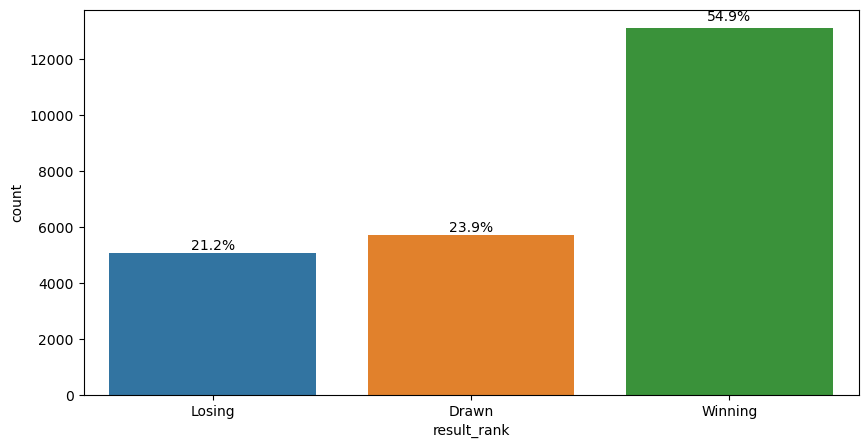

In [47]:
plt.figure(figsize=(10, 5))
total = float(len(df))
ax = sns.countplot(x='result_rank', data=df)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(percentage, (x + width / 2, y + height * 1.02), ha='center')  # Fixed line

plt.show()


# The above graph shows the probability of the result of a match when a high ranked team is playing a low ranked one

# What is the percentage comparing when the highest attack rank plays with the lowest attack rank?

In [49]:
df_rank_attack=df[df['home_team_mean_offense_score'].notnull()]

In [50]:
df_rank_attack=df[df['away_team_mean_offense_score'].notnull()]

In [56]:
def rank_attack(home,away,rank_home,rank_away):
    if rank_home>rank_away:
        return home
    else:
        return away

In [57]:
df_rank_attack['better_attack']=df.apply(lambda x: rank_attack(x['home_team'],x['away_team'],x['home_team_mean_offense_score'],
                                                              x['away_team_mean_offense_score']),axis=1)

In [60]:
df_rank_attack['result_attack']=df_rank_attack.apply(lambda x:result_rank(x['winner'],x['better_attack']),axis=1)

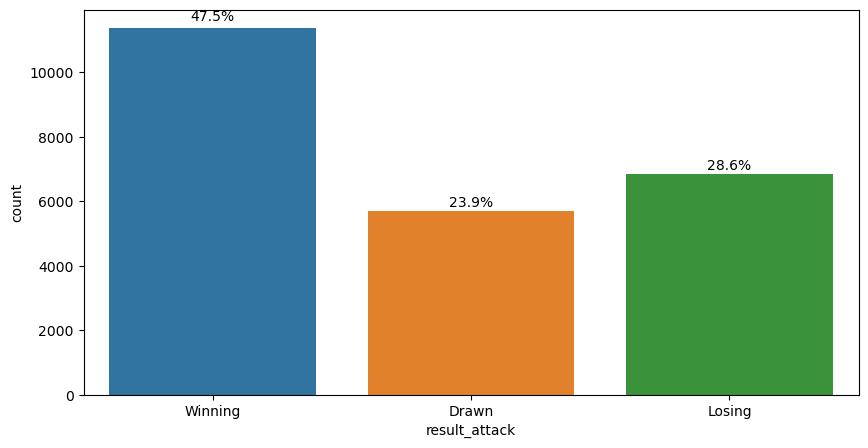

In [61]:
plt.figure(figsize=(10,5))
total=float(len(df_rank_attack))
ax=sns.countplot(x='result_attack',data=df_rank_attack)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(percentage, (x + width / 2, y + height * 1.02), ha='center')  # Fixed line

plt.show()
    

# Do teams with stronger offensive players score more goals and do teams with stronger goalkeeper concede fewer goals?

In [68]:
offence_score=[]
for x in wc_2022:
    of_score=np.round((df[df['home_team']==x]['home_team_mean_offense_score'].mean()+df[df['away_team']==x]['away_team_mean_offense_score'].mean())/2,2)
    offence_score.append(of_score)

offence_scores=pd.DataFrame({'Team': wc_2022, 'Of score':offence_score}).sort_values('Of score',ascending=False).reset_index(drop=True)
offence_scores.index+=1

offence_scores

,Team,Of score
1,Argentina,83.51
2,Spain,82.41
3,France,81.91
4,Netherlands,81.88
5,Portugal,81.81
6,England,81.69
7,Brazil,81.68
8,Uruguay,80.55
9,Germany,80.43
10,Belgium,79.48


In [70]:
goals_conceded_home, goals_scored_home, goals_conceded_away, goals_scored_away = [], [], [], []
total_goals_scored, total_goals_conceded = [], []

for team in wc_2022:
    gch = df[df['home_team'] == team]['away_team_score'].sum()
    gsh = df[df['home_team'] == team]['home_team_score'].sum()
    gca = df[df['away_team'] == team]['home_team_score'].sum()
    gsa = df[df['away_team'] == team]['away_team_score'].sum()

    tgc = np.add(gch, gca)  # total goals conceded
    tgs = np.add(gsh, gsa)  # total goals scored

    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)

    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)

# Creating the DataFrame with all columns, including total goals scored and conceded
goals = pd.DataFrame({
    'Team': wc_2022,
    'Scored goals home': goals_scored_home,
    'Scored goals away': goals_scored_away,
    'Conceded goals home': goals_conceded_home,
    'Conceded goals away': goals_conceded_away,
    'Total scored goals': total_goals_scored,
    'Total conceded goals': total_goals_conceded
})

# Calculating Goal Difference and Goal Ratio
goals['Goal Difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal Ratio'] = goals['Total scored goals'] / goals['Total conceded goals']

# Sorting and resetting the index
goals = goals.sort_values('Goal Difference', ascending=False).reset_index(drop=True)
goals.index += 1

goals


,Team,Scored goals home,Scored goals away,Conceded goals home,Conceded goals away,Total scored goals,Total conceded goals,Goal Difference,Goal Ratio
1,Brazil,558,396,141,159,954,300,654,3.180000
2,Spain,469,312,107,141,781,248,533,3.149194
3,Germany,544,331,220,171,875,391,484,2.237852
4,IR Iran,425,288,115,165,713,280,433,2.546429
5,Netherlands,426,274,145,142,700,287,413,2.439024
6,France,447,223,154,112,670,266,404,2.518797
7,Portugal,424,244,124,144,668,268,400,2.492537
8,England,384,246,132,119,630,251,379,2.509960
9,Japan,533,243,273,153,776,426,350,1.821596
10,Mexico,572,286,272,247,858,519,339,1.653179


In [77]:
# Now see Offence strength vs goals scored

# Merging offence_scores and goals DataFrames on 'Team'
offence_players_vs_goals_scored = offence_scores.merge(goals, on='Team')[['Team', 'Of score', 'Total scored goals']]

# Calculating the 'Total scored goals/Gk score' column
offence_players_vs_goals_scored['Total scored goals/Gk score'] = (
    offence_players_vs_goals_scored['Total scored goals'] / offence_players_vs_goals_scored['Of score']
)

# Sorting by 'Total scored goals/Gk score' in descending order. Gives the score of the top GKs
offence_players_vs_goals_scored = offence_players_vs_goals_scored.sort_values('Total scored goals/Gk score', ascending=False).reset_index(drop=True)

# Resetting the index to start from 1
offence_players_vs_goals_scored.index += 1

offence_players_vs_goals_scored


,Team,Of score,Total scored goals,Total scored goals/Gk score
1,Brazil,81.68,954,11.679726
2,Mexico,77.68,858,11.045314
3,Germany,80.43,875,10.879025
4,Japan,73.87,776,10.504941
5,Saudi Arabia,74.09,762,10.284789
6,USA,75.77,761,10.043553
7,IR Iran,73.97,713,9.639043
8,Spain,82.41,781,9.477005
9,Korea Republic,75.19,685,9.110254
10,Netherlands,81.88,700,8.549096


Text(0.5, 1.0, 'top 10 best team ratio goals/offence score')

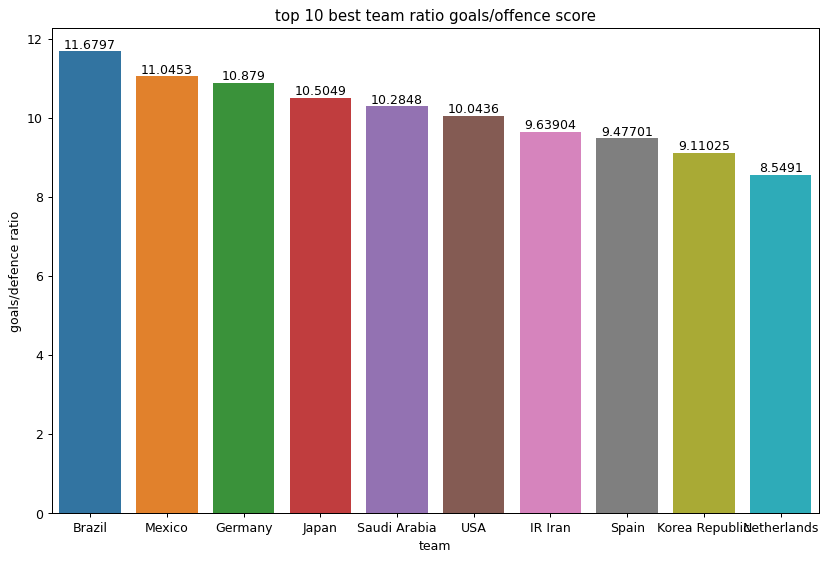

In [78]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=offence_players_vs_goals_scored[:10], x='Team',y='Total scored goals/Gk score') # COnsider only top 10 ones
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('goals/defence ratio')
plt.title('top 10 best team ratio goals/offence score')


# Do teams with stronger goalkeepers concede fewer goals?

In [80]:
# Previously we calculated goals/offence score
# Now we take goals concede/GK score

# Create the initial goalkeeper score DataFrame as before
goalkeeper_score = []

for x in wc_2022:
    # Calculate average goalkeeper score for both home and away games for each team
    gk_score = np.round((
        df[df['home_team'] == x]['home_team_goalkeeper_score'].mean() +
        df[df['away_team'] == x]['away_team_goalkeeper_score'].mean()
    ) / 2, 2)  # Average and round to 2 decimal places
    goalkeeper_score.append(gk_score)

# Create the goalkeeper_scores DataFrame
goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'Gk score': goalkeeper_score})

# Merge with goals DataFrame to add the 'Total conceded goals' column
goalkeeper_scores = goalkeeper_scores.merge(goals[['Team', 'Total conceded goals']], on='Team')

# Calculate the 'Conceded_goals/Gk score ratio'
goalkeeper_scores['Conceded_goals/Gk score ratio'] = (
    goalkeeper_scores['Total conceded goals'] / goalkeeper_scores['Gk score']
)

# Sort by 'Conceded_goals/Gk score ratio' in descending order and reset the index
goalkeeper_scores = goalkeeper_scores.sort_values('Conceded_goals/Gk score ratio', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1  # Start index from 1

goalkeeper_scores




,Team,Gk score,Total conceded goals,Conceded_goals/Gk score ratio
1,Mexico,76.10,519,6.819974
2,Saudi Arabia,71.28,485,6.804153
3,Costa Rica,75.07,473,6.300786
4,Qatar,71.42,448,6.272753
5,Japan,70.97,426,6.002536
6,USA,77.35,452,5.843568
7,Ecuador,71.42,414,5.796696
8,Korea Republic,72.85,413,5.669183
9,Poland,78.18,392,5.014070
10,Ghana,69.61,349,5.013647


Text(0.5, 1.0, 'TOP 10 TEAMS BEST RATIO CONCEDED GOALS/GK SCORE')

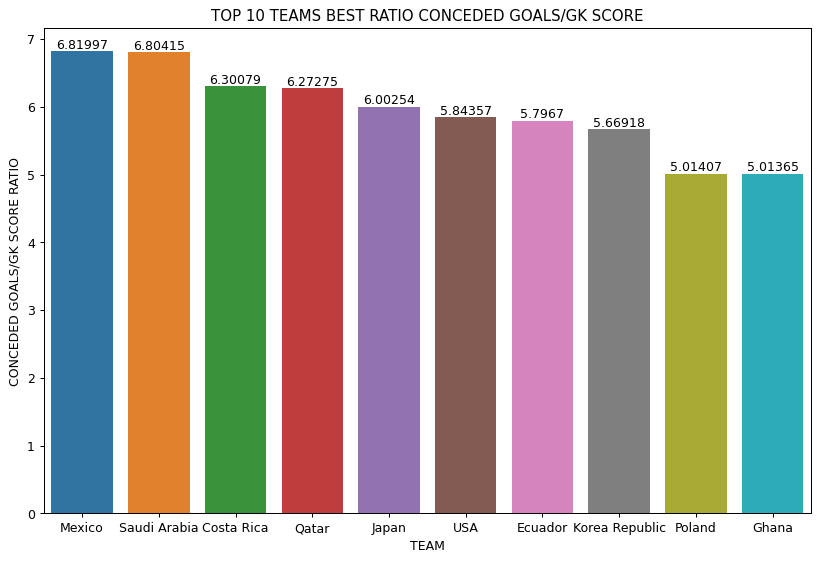

In [82]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=goalkeeper_scores [:10],x='Team',y='Conceded_goals/Gk score ratio')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('CONCEDED GOALS/GK SCORE RATIO')
plt.title('TOP 10 TEAMS BEST RATIO CONCEDED GOALS/GK SCORE')

## Top 10 teams with the longest winning streak

In [86]:
dframes={}
for team in wc_2022:
    df1=df[(df['home_team']==team)|(df['away_team']==team)]
    df1['wins']=np.where(((df1['home_team']==team) & (df1['home_team_result']=='Win')) |  ((df1['away_team']==team) & (df1['home_team_result']=='Lose')),1,0)

    name=team+ '_streak'
    dframes[name]=df1

streaks=[]
for frame in dframes.keys():
    dframes[frame]['start_of_streak']=dframes[frame]['wins'].ne(dframes[frame]['wins'].shift())
    dframes[frame]['streaks_id']=dframes[frame]['start_of_streak'].cumsum()
    dframes[frame]['streak_counter']=dframes[frame].groupby('streaks_id').cumcount()+1

    streak=dframes[frame][dframes[frame]['wins']==1]['streak_counter'].max()
    streaks.append(streak)

Streaks=pd.DataFrame({'Team':wc_2022,'Streak':streaks}).sort_values('Streak',ascending=False).reset_index(drop=True)
Streaks.index+=1
Streaks

,Team,Streak
1,Spain,25
2,France,14
3,Brazil,14
4,Australia,13
5,Belgium,12
6,Morocco,12
7,Saudi Arabia,11
8,USA,11
9,Mexico,10
10,Switzerland,10


Text(0, 0.5, 'Streak')

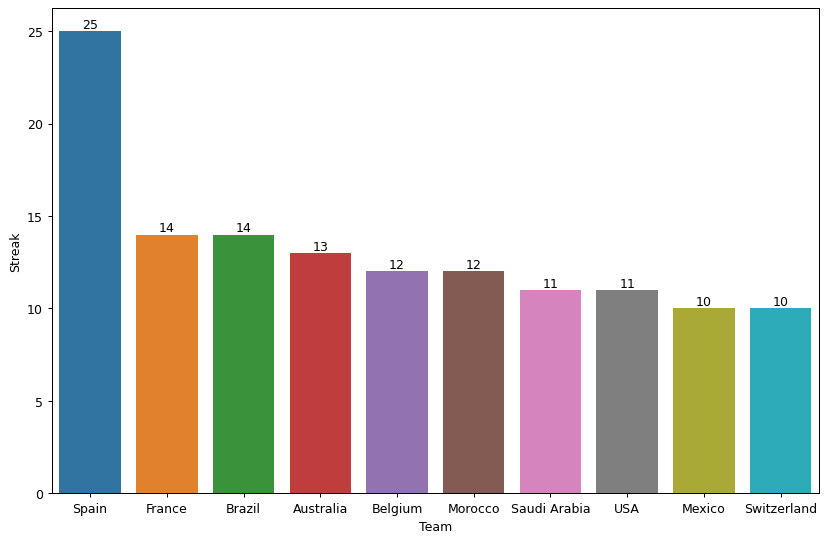

In [89]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=Streaks[:10],x='Team',y='Streak')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Streak')
plt.title('top 10 teams with longest win streak')

# Better team win percentage in home team, away team

In [93]:
away_team_better_rank=df[(df['home_team_fifa_rank']>df['away_team_fifa_rank'])]['home_team_result'].value_counts()
away_team_better_rank

home_team_result
Lose    4984
Win     3429
Draw    2840
Name: count, dtype: int64

In [94]:
home_team_better_rank=df[(df['home_team_fifa_rank']<df['away_team_fifa_rank'])]['home_team_result'].value_counts()
home_team_better_rank

home_team_result
Win     8313
Draw    2542
Lose    1781
Name: count, dtype: int64

In [95]:
# Calculate win percentage for away team with a better rank
away_team_better_rank_wins_percent = np.round(
    100 * away_team_better_rank[0] / away_team_better_rank.sum(), 2
)

# Calculate win percentage for home team with a better rank
home_team_better_rank_wins_percent = np.round(
    100 * home_team_better_rank[0] / home_team_better_rank.sum(), 2
)

# Calculate the total win percentage for both teams with better ranks
total_team_better_rank_wins_percent = np.round(
    100 * (away_team_better_rank[0] + home_team_better_rank[0]) / (away_team_better_rank.sum() + home_team_better_rank.sum()), 2
)

# Creating the DataFrame with calculated win percentages
data = {'win percent': [home_team_better_rank_wins_percent, away_team_better_rank_wins_percent, total_team_better_rank_wins_percent]}
better_team_win_percent = pd.DataFrame(data, index=['home', 'away', 'total'])

better_team_win_percent


,win percent
home,65.79
away,44.29
total,55.66


Text(0.5, 1.0, 'better team win percent')

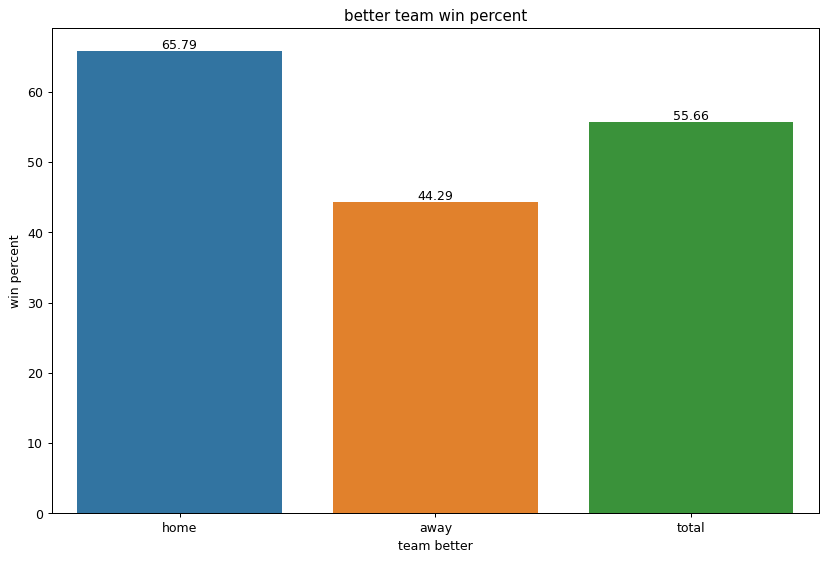

In [96]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=better_team_win_percent,x=better_team_win_percent.index,y='win percent')
ax.bar_label(ax.containers[0])
plt.xlabel('team better')
plt.ylabel('win percent')
plt.title('better team win percent')

# Which country has best Defence, Midfield, Offense and GoalKeeper

In [98]:
ranks = []

for x in wc_2022:
    # Filter matches where the team 'x' is either the home or away team, and sort by date
    rank_df = df[(df['home_team'] == x) | (df['away_team'] == x)].sort_values(['date', 'home_team_fifa_rank']).iloc[0]
    
    # Determine if the team 'x' is the home or away team in the first match and get the corresponding rank
    if rank_df['home_team'] == x:
        rank = rank_df['home_team_fifa_rank']
    else:
        rank = rank_df['away_team_fifa_rank']
    
    # Append the rank to the ranks list
    ranks.append(rank)

# Create a DataFrame with teams and their ranks, sorted by rank
team_ranks = pd.DataFrame({'Team': wc_2022, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1  # Set the index to start from 1

team_ranks


,Team,Rank
1,Germany,1
2,Switzerland,3
3,Argentina,5
4,Brazil,8
5,Denmark,10
6,England,11
7,France,12
8,Spain,13
9,Mexico,14
10,Netherlands,16


In [102]:
goalkeeper_score = []

for x in wc_2022:
    # Calculate the average goalkeeper score for both home and away games for each team
    gk_score = np.round(
        (df[df['home_team'] == x]['home_team_goalkeeper_score'].mean() + 
         df[df['away_team'] == x]['away_team_goalkeeper_score'].mean()) / 2, 2
    )  # Round to 2 decimal places
    goalkeeper_score.append(gk_score)

# Create the goalkeeper_scores DataFrame
goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'Gk score': goalkeeper_score})

# Sort by 'Gk score' in descending order and reset the index
goalkeeper_scores = goalkeeper_scores.sort_values('Gk score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1  # Start index from 1

goalkeeper_scores


,Team,Gk score
1,Spain,83.06
2,Germany,82.27
3,France,81.20
4,Brazil,79.82
5,England,79.11
6,Netherlands,79.03
7,Belgium,78.55
8,Portugal,78.42
9,Poland,78.18
10,USA,77.35


Text(0.5, 1.0, 'Top 10 goalkeeper score')

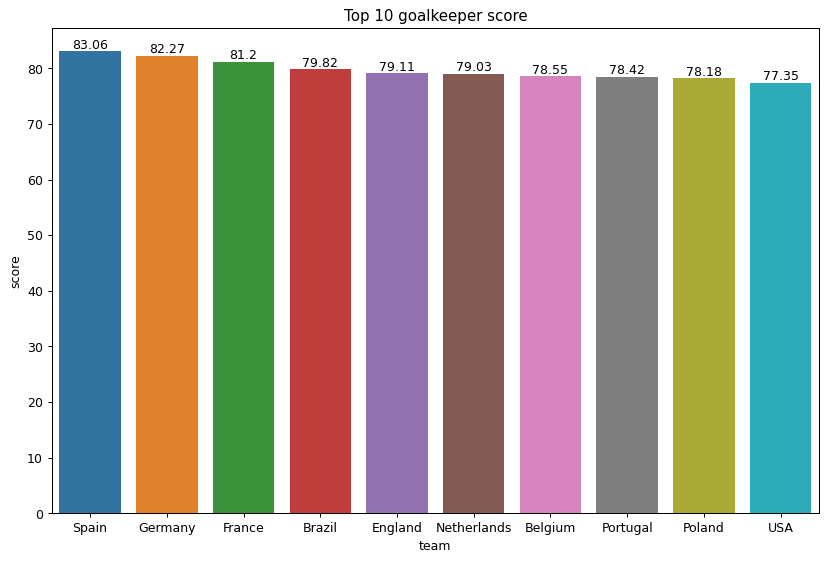

In [104]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=goalkeeper_scores[:10],x='Team',y='Gk score')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title('Top 10 goalkeeper score')

In [108]:
print(df.columns)

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'winner', 'better_rank', 'result_rank'],
      dtype='object')


In [117]:
# rate defence
defence_score = []

for x in wc_2022:
    # Calculate the average defense score for both home and away games for each team
    df_score = np.round((
        df[df['home_team'] == x]['home_team_mean_defense_score'].mean() +
        df[df['away_team'] == x]['away_team_mean_defense_score'].mean()
    ) / 2, 2)  # Average and round to 2 decimal places
    defence_score.append(df_score)

# Create the defence_scores DataFrame
defence_scores = pd.DataFrame({'Team': wc_2022, 'Df score': defence_score})

# Sort by 'Df score' in descending order and reset the index
defence_scores = defence_scores.sort_values('Df score', ascending=False).reset_index(drop=True)
defence_scores.index += 1  # Start index from 1

defence_scores


,Team,Df score
1,Spain,80.64
2,Serbia,80.23
3,England,79.80
4,Germany,79.32
5,Brazil,79.31
6,France,79.19
7,Portugal,78.92
8,Argentina,78.48
9,Belgium,77.54
10,Netherlands,77.17


Text(0.5, 1.0, 'Top 10 strongest defence')

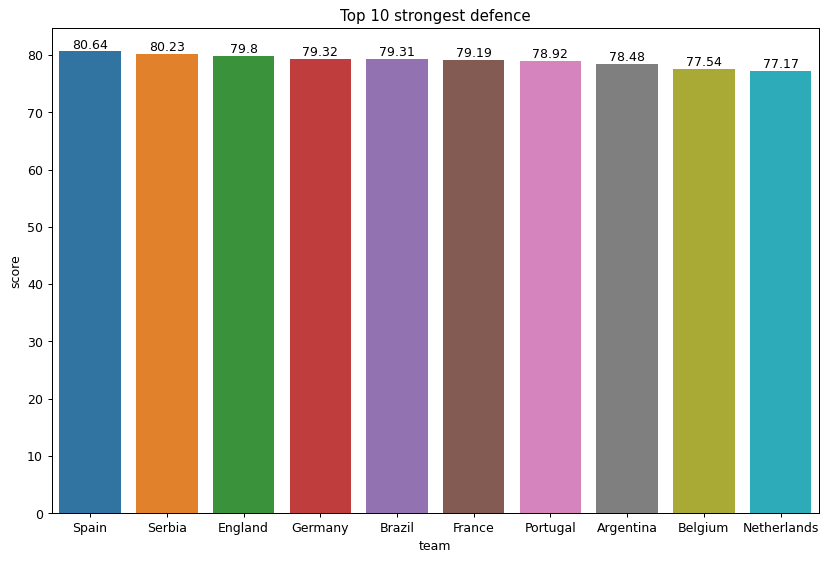

In [119]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=defence_scores[:10],x='Team',y='Df score')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title('Top 10 strongest defence')

In [120]:
# Rate the attackof the teams
attack=[]
for x in wc_2022:
    of_score=np.round((
        df[df['home_team'] == x]['home_team_mean_offense_score'].mean() +
        df[df['away_team'] == x]['away_team_mean_offense_score'].mean()
    ) / 2, 2) 
    attack.append(of_score)
attack=pd.DataFrame({'Team': wc_2022, 'Attack stren': attack}).sort_values('Attack stren',ascending=False).reset_index(drop=True)
attack.index+=1
attack

,Team,Attack stren
1,Argentina,83.51
2,Spain,82.41
3,France,81.91
4,Netherlands,81.88
5,Portugal,81.81
6,England,81.69
7,Brazil,81.68
8,Uruguay,80.55
9,Germany,80.43
10,Belgium,79.48


Text(0.5, 1.0, 'Top 10 strongest Attack')

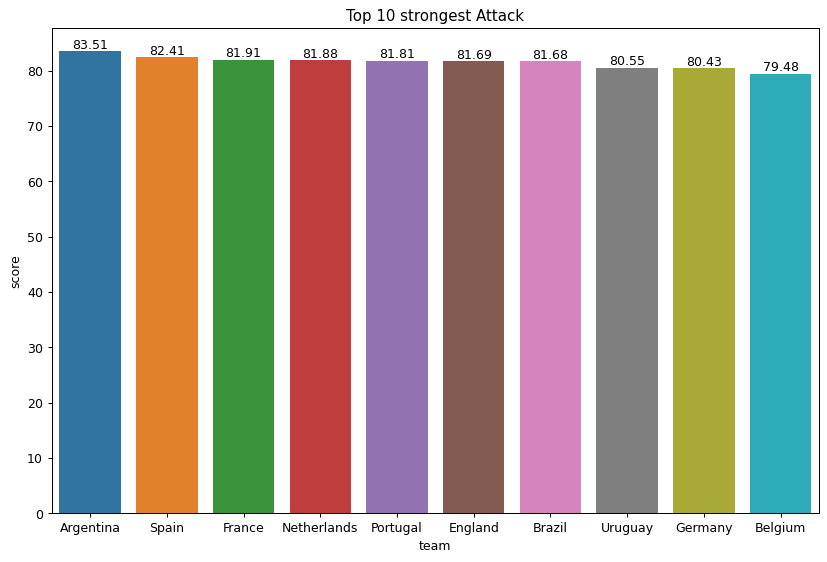

In [122]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=attack[:10],x='Team',y='Attack stren')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title('Top 10 strongest Attack')

In [124]:
# Mid field stren
midfield_score = []

for x in wc_2022:
    # Calculate the average midfield score for both home and away games for each team
    md_score = np.round((
        df[df['home_team'] == x]['home_team_mean_midfield_score'].mean() +
        df[df['away_team'] == x]['away_team_mean_midfield_score'].mean()
    ) / 2, 2)  # Average and round to 2 decimal places
    midfield_score.append(md_score)

# Create the midfield_scores DataFrame
midfield_scores = pd.DataFrame({'Team': wc_2022, 'Md score': midfield_score})

# Sort by 'Md score' in descending order and reset the index
midfield_scores = midfield_scores.sort_values('Md score', ascending=False).reset_index(drop=True)
midfield_scores.index += 1  # Start index from 1

midfield_scores


,Team,Md score
1,Spain,83.11
2,France,82.04
3,Germany,81.62
4,England,81.16
5,Argentina,80.94
6,Brazil,80.82
7,Portugal,80.77
8,Netherlands,80.58
9,Serbia,80.31
10,Belgium,79.20


Text(0.5, 1.0, 'Top 10 Midfield score')

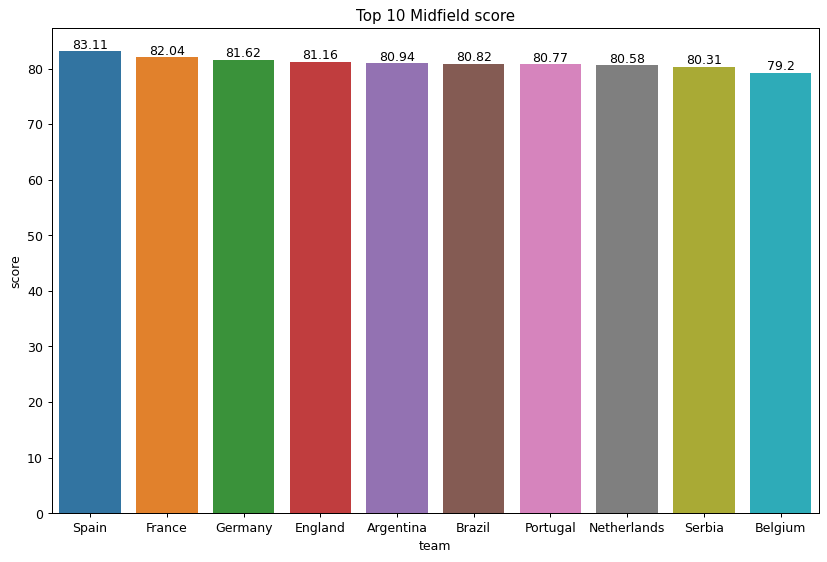

In [126]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=midfield_scores[:10],x='Team',y='Md score')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title('Top 10 Midfield score')

# Which are the teams with high win percentage

In [127]:
# win percentage
hwins,hdraws,hloses=[],[],[]
awins,adraws,aloses=[],[],[]
for team in wc_2022:
    home_win=df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
    home_draw=df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
    home_lose=df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]

    away_win=df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
    away_draw=df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
    away_lose=df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]

    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)

    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)

    wins=np.add(hwins,awins)
    draws=np.add(hdraws,adraws)
    loses=np.add(hloses,aloses)

In [130]:
win_draw_lose=pd.DataFrame({'Team':wc_2022,'Win':wins,'Draw':draws,'Lose':loses,
                           'Home win':hwins,'Home draw':hdraws,'Home lose':hloses,
                           'Away win':awins,'Away draw':adraws,'Away lose':aloses})
win_draw_lose.insert(1,'Total',win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8,'Total Home',win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
win_draw_lose.insert(1,'Total Away',win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %']=np.around(100*win_draw_lose['Win']/win_draw_lose['Total'],2)
win_draw_lose['Draw %']=np.around(100*win_draw_lose['Draw']/win_draw_lose['Total'],2)
win_draw_lose['Lose %']=np.around(100*win_draw_lose['Lose']/win_draw_lose['Total'],2)

win_draw_lose['Home Win %']=np.around(100*win_draw_lose['Home win']/win_draw_lose['Total Home'],2)
win_draw_lose['Home Draw %']=np.around(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'],2)
win_draw_lose['Home Lose %']=np.around(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'],2)

win_draw_lose['Away Win %']=np.around(100*win_draw_lose['Away win']/win_draw_lose['Total Away'],2)
win_draw_lose['Away Draw %']=np.around(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'],2)
win_draw_lose['Away Lose %']=np.around(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'],2)
win_draw_lose=win_draw_lose.sort_values('Win %',ascending=False).reset_index(drop=True)
win_draw_lose.index+=1
win_draw_lose.style.set_properties(**{'background-color':'green','color':'white'},subset=['Home win','Home Win %','Win %'])

,Team,Total Away,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,200,433,301,76,56,181,31,21,233,120,45,35,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
2,Spain,165,354,246,64,44,145,27,17,189,101,37,27,69.490000,18.080000,12.430000,76.720000,14.290000,8.990000,61.210000,22.420000,16.360000
3,France,149,370,230,83,57,145,44,32,221,85,39,25,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
4,Germany,171,390,240,82,68,139,44,36,219,101,38,32,61.540000,21.030000,17.440000,63.470000,20.090000,16.440000,59.060000,22.220000,18.710000
5,IR Iran,175,366,217,79,70,133,31,27,191,84,48,43,59.290000,21.580000,19.130000,69.630000,16.230000,14.140000,48.000000,27.430000,24.570000
6,Netherlands,148,340,201,74,65,119,40,33,192,82,34,32,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,152,336,198,79,59,123,37,24,184,75,42,35,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Argentina,177,367,216,79,72,130,36,24,190,86,43,48,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
9,England,140,334,196,75,63,124,38,32,194,72,37,31,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
10,Croatia,166,320,172,79,69,92,38,24,154,80,41,45,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000


Text(0.5, 1.0, 'top 15 teams with highest win percentage')

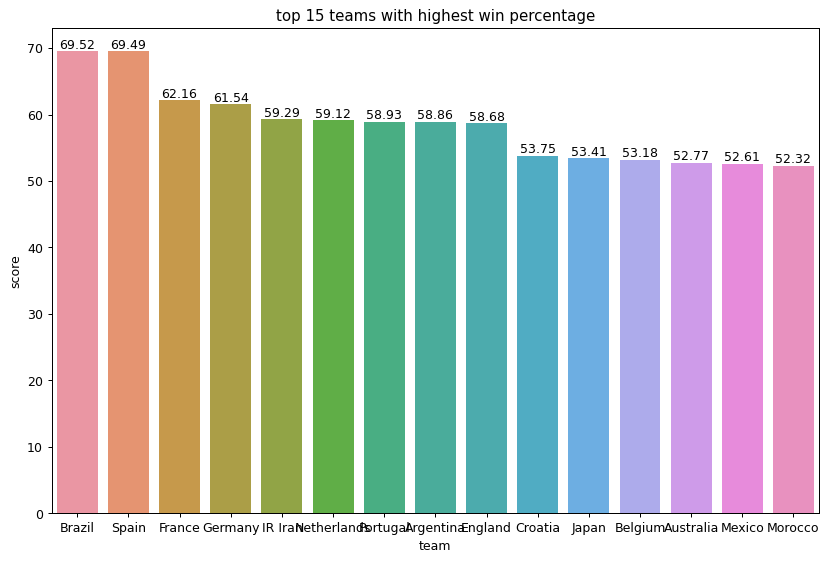

In [132]:
plt.figure(figsize=(11,7),dpi=90)
ax=sns.barplot(data=win_draw_lose[:15],x='Team',y='Win %')
ax.bar_label(ax.containers[0])
plt.xlabel('team')
plt.ylabel('score')
plt.title('top 15 teams with highest win percentage')

In [133]:
df['rank_difference']=df['home_team_fifa_rank']-df['away_team_fifa_rank']
df['average_rank']=(df['home_team_fifa_rank']+df['away_team_fifa_rank'])/2
df['point_difference']=df['home_team_total_fifa_points']-df['away_team_total_fifa_points']
df['score_difference']=df['home_team_score']=df['away_team_score']

In [134]:
df['is_won']=df['score_difference']>0
df['is_stake']=df['tournament']!='Friendly'

In [135]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'winner', 'better_rank', 'result_rank', 'rank_difference',
       'average_rank', 'point_difference', 'score_difference', 'is_won',
       'is_stake'],
      dtype='object')

# Final Winner Prediction

In [136]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

Text(0.5, 1.0, 'AUC score is 0.64')

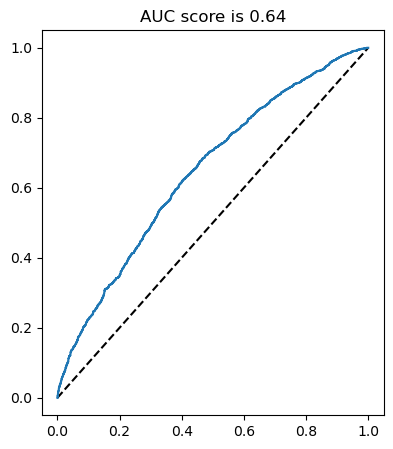

In [140]:
# We will train and test the data by Logistic Regression 
X,y=df.loc[:,['average_rank','rank_difference','point_difference']],df['is_won']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

logreg=linear_model.LogisticRegression(C=1e-5)
features=PolynomialFeatures(degree=2)

model=Pipeline([
    ('polynomial_features', features),
    ('logidtic_regression', logreg)
])
model=model.fit(X_train,y_train)
fpr,tpr,_=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
ax.plot([0,1],[0,1],'k--')
ax.plot(fpr,tpr)
# Format the title string first
title = 'AUC score is {0:0.2f}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Set the formatted title
ax.set_title(title)


In [158]:
world_cup_rankings_home=df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].notna()]
world_cup_rankings_away=df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].notna()]
world_cup_rankings_home=world_cup_rankings_home.set_index(['home_team'])

In [159]:
# Separate the performance of each team as home or away
world_cup_rankings_home=world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away=world_cup_rankings_away.groupby('away_team').mean()

In [162]:
world_cup_rankings_away.head(15)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Afghanistan,165.107692,271.169231
Albania,76.842105,377.938596
Algeria,50.357664,447.620438
American Samoa,200.500000,67.428571
Andorra,166.184783,229.989130
Angola,82.418301,183.647059
Anguilla,202.214286,295.535714
Antigua and Barbuda,131.907692,239.800000
Argentina,5.807910,483.299435


In [164]:
world_cup_rankings_away.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'United Arab Emirates', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Wales', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='away_team', length=211)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.60it/s]


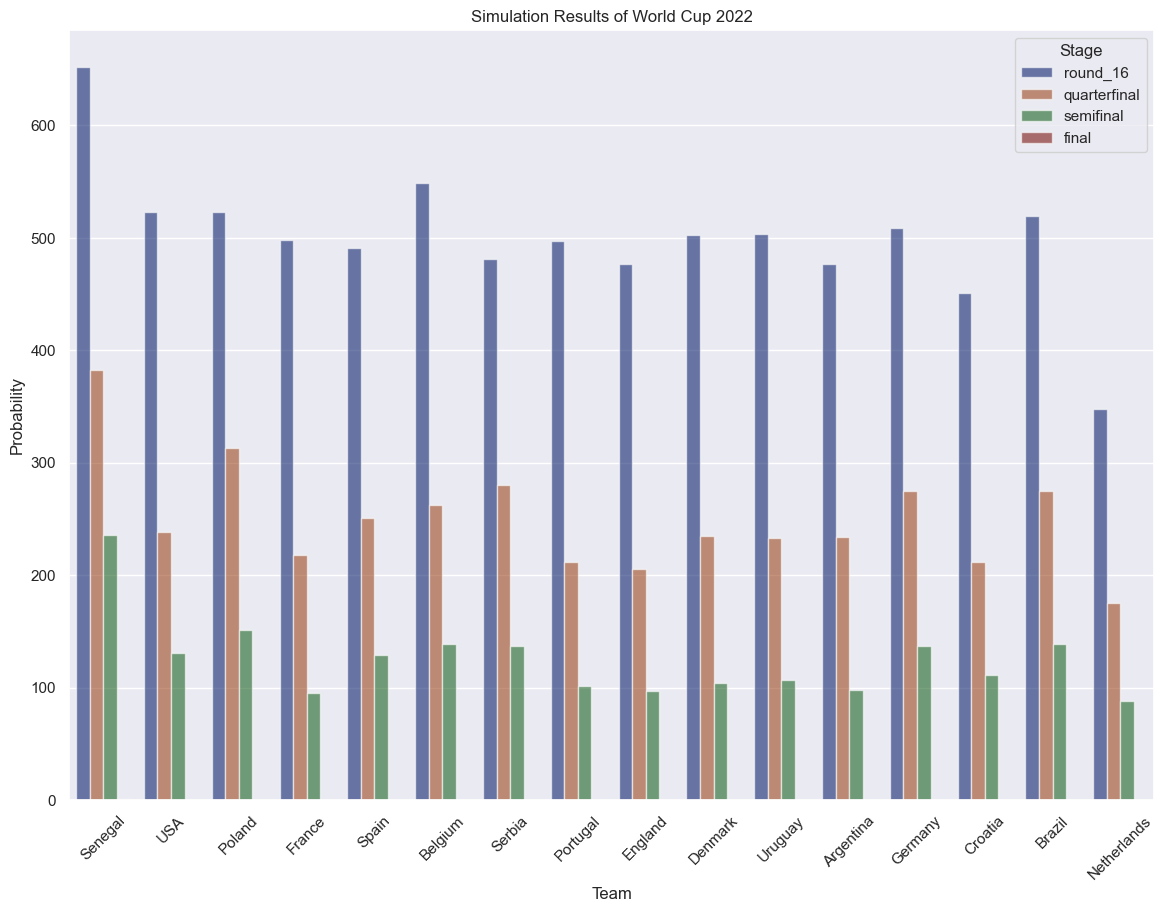

In [179]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize result lists
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000  # Number of Simulations

# Define initial candidates and stages
candidates = ['Senegal', 'Netherlands', 'England', 'USA', 'Argentina', 'Poland', 'France', 'Denmark', 
              'Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal', 'Uruguay']
finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

# Run simulations
for j in tqdm(range(n_simulations)):
    candidates = ['Senegal', 'Netherlands', 'England', 'USA', 'Argentina', 'Poland', 'France', 'Denmark', 
                  'Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal', 'Uruguay']  # Reset for each simulation
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        winners = []
        prob = []
        
        # Match each pair of teams
        for i in range(iterations):
            home = candidates[i * 2]
            away = candidates[i * 2 + 1]
            
            # Set up row data for prediction
            row = pd.DataFrame(np.array([np.nan, np.nan, True]).reshape(1, -1), columns=X_test.columns)
            
            # Extract team rankings and points
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            
            # Calculate features for prediction
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            
            # Predict win probability for the home team
            home_win_prob = model.predict_proba(row)[:, 1][0]
            
            # Simulate match outcome
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome == 0 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome == 0 else prob.append(simulated_outcome)
        
        # Save results for each stage
        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = zip(step_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns=['Step', 'Team', 'Prob'])
            simulation_df_round16.append(df_candidates_round_16)
            simulation_results_round16.append(winners)
        
        elif f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(step_quarterfinal, winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns=['Step', 'Team', 'Prob'])
            simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            simulation_results_quarterfinal.append(winners)
        
        elif f == 'semifinal':
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal, winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns=['Step', 'Team', 'Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)
        
        elif f == 'final':
            step_final = ['final']
            df_final = pd.DataFrame({'Step': step_final * len(winners), 'Team': winners, 'Prob': prob})
            simulation_results_winners.append(winners)
        
        # Move winners to the next round of candidates
        candidates = winners

# Concatenate DataFrames for all rounds
df_candidates_round_16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)

# Concatenate winners for final results
df_candidates_final = pd.concat([pd.DataFrame({'Step': 'final', 'Team': winners, 'Prob': prob}) 
                                  for winners, prob in zip(simulation_results_winners, prob)])

# Combine all results into a single DataFrame
df_results = pd.concat([df_candidates_round_16, df_candidates_quarterfinal, df_candidates_semifinal, df_candidates_final])

# Flatten results lists for each stage
simulation_results_round16 = sum(simulation_results_round16, [])
simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
simulation_results_semifinal = sum(simulation_results_semifinal, [])
simulation_results_winners = sum(simulation_results_winners, [])

df_results.reset_index(drop=True, inplace=True)

# Plotting the results
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize': (14, 10)})
g = sns.barplot(data=df_results, x='Team', y='Prob', hue='Step', estimator=sum, palette='dark', alpha=.6)

plt.xlabel('Team')
plt.ylabel('Probability')
plt.title('Simulation Results of World Cup 2022')
plt.legend(title='Stage')
plt.xticks(rotation=45)
plt.show()
